In [1]:
#import tensorflow 
import tensorflow as tf
# You can avoid the long names by using
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'font.family': 'DejaVu Sans',
          'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# sns.set_style("white")

In [3]:
# Read the `cosine.csv` file
df = pd.read_csv('cosine.csv')

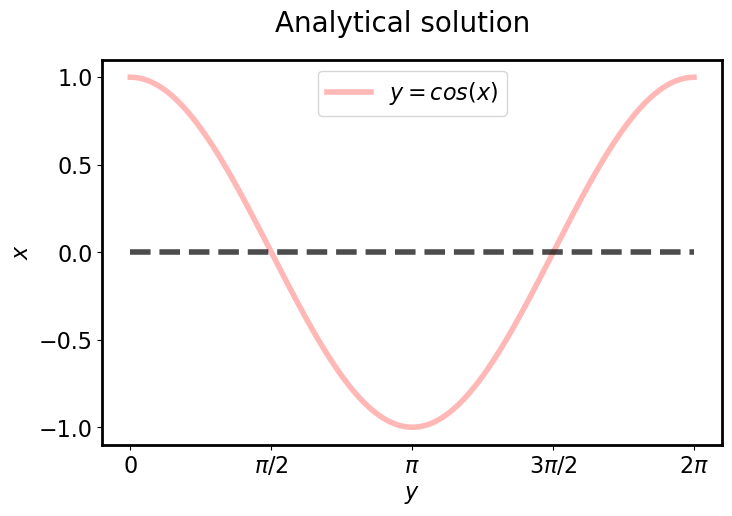

In [4]:
x,y = df.x.values.reshape(-1,1),df.y.values.reshape(-1,1)

fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x,y,label='$y = cos(x)$',color ='#FF9A98',lw=4,alpha=0.7)
ax.plot([0,6.28],[0,0],'--',color ='k',lw=4,alpha=0.7)
ax.set_xlabel('$y$',fontsize=16)
ax.set_ylabel('$x$',fontsize=16)
ax.legend(loc='upper center')
ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$', r'$\pi$'
          , r'$3\pi/2$', r'$2\pi$']
ax.set_xticklabels(labels)

fig.suptitle('Analytical solution',fontsize=20);

In [5]:
# Define your neural network as per the instructions

mlp = keras.Sequential()
mlp.add(tf.keras.layers.Dense(32, activation= tf.sin, input_shape=(x.shape[1],)))
mlp.add(tf.keras.layers.Dense(1))  # Output layer for regression

mlp.summary()

f:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# Instantiate an optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Initialize a list to store the losses
losses = []

# Define number of epochs
num_epochs = 4000

# Run a loop for the number of epochs
for i in range(num_epochs):

    # Open a GradientTape
    with tf.GradientTape() as tape:

        # Forward pass.
        output = mlp(x, training=True)

        # Loss value for this batch.
        loss = loss_fn(y, output)

    # Get gradients of weights wrt the loss.
    gradients = tape.gradient(loss, mlp.trainable_variables)

    # Update the weights of our linear layer.
    # Use optimizer.apply_gradients() function
    optimizer.apply_gradients(zip(gradients,mlp.trainable_variables))

    # Append the loss to the losses list
    losses.append(loss)
    
    # For every 100th epoch print the loss
    if i%100==0:
        print(f'Loss is {loss} at epoch {i}')

Loss is 0.5303160548210144 at epoch 0
Loss is 0.10154463350772858 at epoch 100
Loss is 0.027070781216025352 at epoch 200
Loss is 0.02598508819937706 at epoch 300
Loss is 0.024650054052472115 at epoch 400
Loss is 0.02315562777221203 at epoch 500
Loss is 0.02188052237033844 at epoch 600
Loss is 0.020988060161471367 at epoch 700
Loss is 0.020208260044455528 at epoch 800
Loss is 0.019323714077472687 at epoch 900
Loss is 0.018257534131407738 at epoch 1000
Loss is 0.016957050189375877 at epoch 1100
Loss is 0.015364289283752441 at epoch 1200
Loss is 0.013423814438283443 at epoch 1300
Loss is 0.011109028942883015 at epoch 1400
Loss is 0.008470406755805016 at epoch 1500
Loss is 0.005701641086488962 at epoch 1600
Loss is 0.003188036847859621 at epoch 1700
Loss is 0.0013838752638548613 at epoch 1800
Loss is 0.0004456551105249673 at epoch 1900
Loss is 0.00010680461127776653 at epoch 2000
Loss is 2.00303675228497e-05 at epoch 2100
Loss is 3.2433681553811766e-06 at epoch 2200
Loss is 6.2497628050550

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


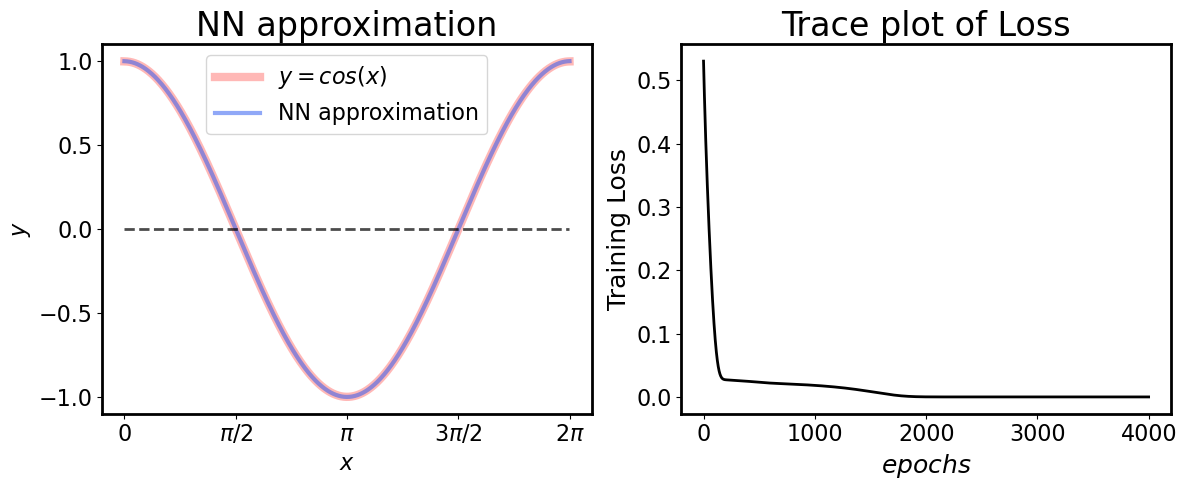

In [7]:
# Use the helper code below to visualize your results

y_pred = mlp.predict(x)
fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(x,y,label='$y=cos(x)$',color ='#FF9A98',lw=6,alpha=0.7)
axes[0].plot(x,y_pred,'-',label='NN approximation',color ='#2252f0',lw=3,alpha=0.5,markersize=10)
axes[0].plot([0,6.28],[0,0],'--',color ='k',lw=2,alpha=0.7)
axes[0].set_xlabel('$x$',fontsize=16)
axes[0].set_ylabel('$y$',fontsize=16)
axes[0].legend(loc='upper center')
axes[0].set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = ['$0$', r'$\pi/2$', r'$\pi$'
          , r'$3\pi/2$', r'$2\pi$']
axes[0].set_xticklabels(labels)

axes[1].plot(losses,lw=2,color='k')
axes[1].set_title('Trace plot of Loss',fontsize=24);
axes[1].set_xlabel('$epochs$',fontsize=18)
axes[1].set_ylabel('Training Loss',fontsize=18)


axes[0].set_title('NN approximation',fontsize=24);
plt.tight_layout()